In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
dataset = pd.read_csv('Bengaluru_House_Data.csv')
print(dataset.shape, '\n')
dataset.head()

(13320, 9) 



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# 1. Data cleaning

In this dataset our main aim to find the 'price' of real estates, so 'price' is our Target feature( independent feature).

steps to perform:
1. Plot some relationship
2. Drop unwanted features
2. Handle the NaN values
3. Handle the errors

# 1.1 Plotting relationship 

Text(0, 0.5, 'count')

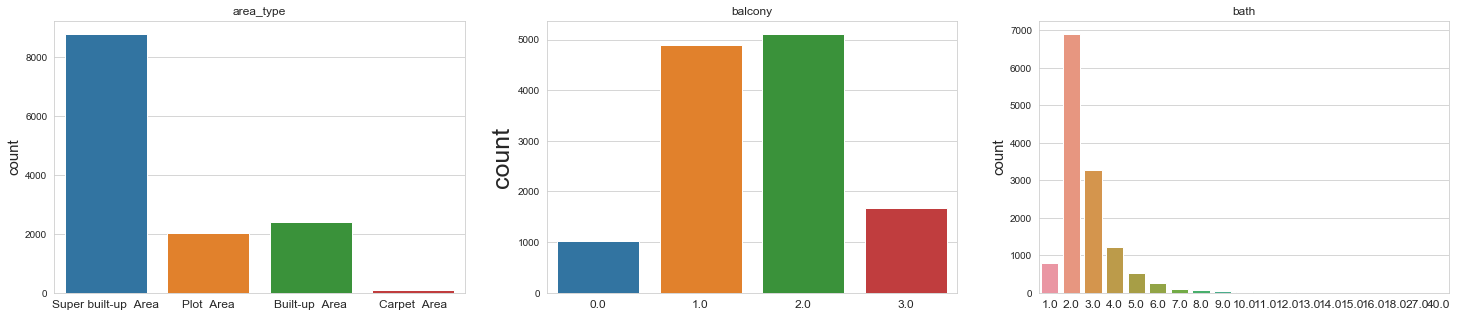

In [69]:
# plotting count of 'area_type' feature
sns.set_style('whitegrid')
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.countplot('area_type', data=dataset)
plt.title('area_type')
plt.xlabel(None)
plt.ylabel('count',fontsize=15)
plt.xticks(fontsize=12)

# Count of balcony
plt.subplot(1,3,2)
sns.set_style('whitegrid')
sns.countplot('balcony', data=dataset)
plt.title('balcony')
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.ylabel('count',fontsize=25)

# Count of bathrooms
plt.subplot(1,3,3)
sns.set_style('whitegrid')
sns.countplot('bath', data=dataset)
plt.title('bath')
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.ylabel('count',fontsize=15)

# 1.2 Dropping out un-wanted columns

In [70]:
# dropping out un-wanted columns
dataset_1 = dataset.drop(['area_type', 'society','balcony', 'availability'], axis='columns')
dataset_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# 1.3 Handling NaN values

In [71]:
dataset_1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

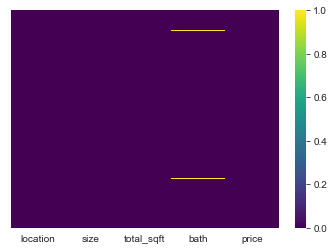

In [72]:
# visualizing NaN values in every feature
sns.heatmap(dataset_1.isnull(), yticklabels=False, cmap='viridis')

##### As we can see from the above operations that there are few NaN values in 'location' , 'total_sqft' & 'bath' feature columns. 
If there are very large number of NaN values, we prefer to find the median of every column values and replace NaN values with the median value.
This is the process of handling NaN values and cleaning the data.

But in this dataset, there are very few NaN values, so we will drop the rows of each feature where NaN values are present as there are 13320 rows.

In [73]:
dataset_2 = dataset_1.dropna()
dataset_2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

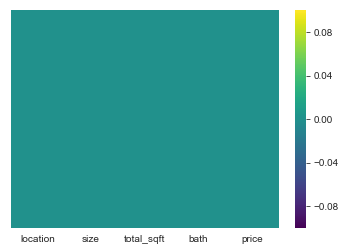

In [74]:
sns.heatmap(dataset_2.isnull(), yticklabels=False, cmap='viridis')

##### As you can see now  our data is free from NaN values

# 1.4 Handling the errors

#### While looking at the 'size' column. It tells us no. of bedrooms and bhk in every house. Reading two types of values i.e bhk and bedroom even if they are actually similar.

In [75]:
dataset_2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### What can we do?
#### yeah! we can merge the bhk and Bedroom and replace it with a new column 'bhk', taking only numerical values. And it will make our work easy.

In [76]:
dataset_2['bhk'] = dataset_2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Aman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
dataset_2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [78]:
dataset_2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

##### As we closely look into our 'bhk' feauture column, we can observe that there is a value '43'. And its strange for a house to have 43 bedrooms. Something's fishy here.
##### Lets explore this error.

In [79]:
dataset_2[dataset_2.bhk >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


##### Explore total_sqft feature

In [80]:
dataset_2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

##### Here from unique values, we can see a range value. But for good working, we want values only in float format.
##### We will make and use a function to check the value is float or not.

In [81]:
#function to check the value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [82]:
dataset_2[~dataset_2['total_sqft'].apply(is_float)].head(10) # with the use of ~ , it displays values which are not float i.e range values ( which are actually error values)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range.
##### There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [83]:
#function to take average of range values only
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None    

#### Updating the values i.e average of range values of 'total_sqft' in new feature column 'total_sqft_avg' 

In [84]:
dataset_3 = dataset_2.copy()
dataset_3['total_sqft']= dataset_3.total_sqft.apply(convert_sqft_to_num)
# dataset_3 = dataset_3[dataset_3.total_sqft.notnull()]
dataset_3.head(3)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [85]:
dataset_3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [90]:
dataset_3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [87]:
dataset_3.to_csv('df.csv', index=False)

##### Now after performing Data cleaning, We have our clean dataset. I exported this data into a new dataset i.e 'df.csv', that I wil use in further process.